In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [4]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/sashutosh/DeepLearning/master/Data/Results_clean_v2.csv")
raw_data

,timeStamp,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,flowDurationList,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,cpuByProcessList,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,diskByProcessList,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,memByProcessList,percentageHeap,medianOfHeap,maxHeap,percentHeapList,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,percentWorkerThreadsList,avgInBufferSize,medianOfInBuffer,maxInBuffer,inBufferSizeList,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,percentOutBufferList,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu,systemCpuJmxList
0,Jan 10-- 2021 9:15:32 AM,12966.0,13078,14719,14719;13078;13672;12126;11235;,0.112635,0.124,0.170,0.1092260856108677;0.12353175828438517;0.15970...,3.230190e+08,3.230000e+08,323020917,323020917;323019354;323018833;323018312;323017...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.184841,0.224,0.325,0.2554077362030569;0.3245863434169461;0.095981...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.245333,2.027,2.107,0.02666666666666667;2.106666666666667;2.026666...,0.113167,0.119,0.175,0.10934549395867632;0.11894290098652129;0.1608...
1,Jan 10-- 2021 10:00:16 AM,12150.6,11829,13391,13266;11829;10532;13391;11735;,0.111258,0.138,0.158,0.10703425759446372;0.13787605655030938;0.1528...,3.230241e+08,3.230000e+08,323025606,323025606;323024564;323024043;323023522;323023...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.196522,0.168,0.342,0.1683658401249434;0.2133725508438494;0.103132...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.658667,2.027,4.040,0.05333333333333334;0.06666666666666667;4.04;2...,0.110290,0.137,0.160,0.11640956064683629;0.13676235709501172;0.1596...
2,Jan 10-- 2021 10:01:55 AM,13150.4,13845,14594,14594;13845;14360;13250;9703;,0.173955,0.208,0.222,0.18856740664698599;0.22046478079850015;0.2083...,3.230295e+08,3.230000e+08,323030816,323030816;323030295;323029253;323028732;323028...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.169525,0.178,0.339,0.17836349632339468;0.33850935520957354;0.2058...,3.000000,3.0,3,3.0;3.0;3.0;3.0;3.0;,0.200000,0.0,1,1;0;0;0;0;,1.274667,0.107,4.040,0.10666666666666667;4.04;0.09333333333333334;0...,0.176758,0.210,0.228,0.1985885535090306;0.2164285809390769;0.210024...
3,Jan 10-- 2021 10:03:56 AM,13566.0,13610,14188,13610;14188;12844;13391;13797;,0.234493,0.261,0.308,0.3084422506340378;0.23552775902134276;0.26140...,3.230350e+08,3.230000e+08,323036547,323036547;323036026;323035505;323034984;323034...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;52.0;,0.201747,0.239,0.321,0.28046812213182537;0.06476824013161088;0.1540...,4.285714,4.0,6,4.0;6.0;4.0;4.0;4.0;4.0;4.0;,0.000000,0.0,0,0;0;0;0;0;0;0;,0.840000,0.267,3.027,0.26666666666666666;0.26666666666666666;3.0266...,0.234362,0.257,0.308,0.3084400480316922;0.23597092805271735;0.25705...
4,Jan 10-- 2021 10:05:52 AM,13694.4,13438,14828,14518;12985;13438;14828;12703;,0.257938,0.295,0.314,0.293011262335781;0.2705949019938888;0.3140254...,3.230411e+08,3.230000e+08,323042799,323042799;323042278;323041236;323040715;323040...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;,0.211632,0.222,0.345,0.31847118623185866;0.15339040756225586;0.2906...,5.000000,5.0,5,5.0;5.0;5.0;5.0;5.0;5.0;,0.000000,0.0,0,0;0;0;0;0;0;,1.075556,0.100,4.067,0.05333333333333334;0.10666666666666667;0.0933...,0.260198,0.302,0.319,0.30259890338475426;0.27025738379102726;0.3039...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Jan 26-- 2021 5:13:16 AM,23613.8,22689,27845,27845;24470;20892;22173;22689;,0.558756,0.618,0.683,0.6361258801737352;0.6825222787998959;0.634629...,1.760265e+09,1.760000e+09,1761229423,1761229423;1760402448;1760237053;1760071658;17...,54.0,54.0,54,54.0;54.0;54.0;54.0;54.0;54.0;,0.391196,0.329,0.837,0.8369598614538878;0.45946660604620165;0.28641...,47.333333,47.0,48,47.0;47.0;47.0;47.0;48.0;48.0;,1.833333,0.0,11,0;0;0;11;0;

In [7]:
#Removing all list data
ras_metrics=raw_data[['averageExecutionTime','avgCpuByProcess','medianOfCpuByProcess','maxCpuByProcess','avgDiskByProcess','medianOfDiskByProcess','maxDiskByProcess','avgMemByProcess','medianOfMemByProcess','maxMemByProcess','percentageHeap','medianOfHeap','maxHeap','percentageWorkerThreads','medianOfWorkerThreads','maxWorkerThreads','avgInBufferSize','medianOfInBuffer','maxInBuffer','percentageOutBuffer','medianOfOutBuffer','maxOutBuffer','avgSystemCpuJmx','medianOfSystemCpu','maxSystemCpu']]
ras_metrics.describe()


,averageExecutionTime,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
count,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1.001000e+03,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,18733.003197,0.281965,0.300243,0.401002,1.829535e+09,1.829295e+09,1.830428e+09,47.607412,47.606394,47.615385,0.362306,0.362322,0.466484,29.764607,29.756244,30.847153,0.969633,0.734266,1.919081,1.863504,1.588500,3.883035,0.285370,0.303779,0.405332
std,18674.395889,0.191692,0.207350,0.258964,1.463316e+09,1.463231e+09,1.463975e+09,10.888048,10.888017,10.885078,0.177689,0.184013,0.194023,20.652822,20.693055,21.409662,5.315752,4.786159,10.547817,0.953616,1.219071,2.059587,0.194326,0.210422,0.261901
min,9073.000000,0.030818,0.016000,0.057000,1.196239e+08,1.200000e+08,1.196239e+08,18.000000,18.000000,18.000000,0.076415,0.054000,0.107000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11897.600000,0.084526,0.093000,0.140000,3.269283e+08,3.270000e+08,3.269346e+08,51.000000,51.000000,51.000000,0.207735,0.207000,0.310000,12.166667,12.000000,13.000000,0.000000,0.000000,0.000000,1.130000,0.560000,2.173000,0.086418,0.095000,0.142000
50%,13210.200000,0.279197,0.296000,0.384000,1.707482e+09,1.710000e+09,1.707485e+09,52.000000,52.000000,52.000000,0.320339,0.313000,0.409000,28.000000,28.000000,28.000000,0.000000,0.000000,0.000000,1.713333,1.427000,4.027000,0.281380,0.300000,0.389000
75%,15934.800000,0.419132,0.457000,0.587000,2.583467e+09,2.580000e+09,2.583467e+09,53.000000,53.000000,53.000000,0.509635,0.510000,0.618000,44.833333,45.000000,47.000000,0.000000,0.000000,0.000000,2.506667,2.240000,4.640000,0.423855,0.465000,0.598000
max,233506.200000,0.809707,0.906000,1.000000,6.311979e+09,6.310000e+09,6.318758e+09,54.000000,54.000000,54.000000,0.881175,0.881000,0.934000,91.333333,91.000000,92.000000,93.000000,93.000000,146.000000,5.000000,6.253000,12.453000,0.816411,0.909000,1.000000


In [6]:
#Visualization output variable
#Visualization of dependent variable
fig = px.histogram(ras_metrics, x="averageExecutionTime",title='Distribution of ExecutionTime',height=400)
fig.show()

In [8]:
#Clipping at 20K 
ras_metrics=ras_metrics.loc[ras_metrics['averageExecutionTime']<=20000]
fig = px.histogram(ras_metrics, x="averageExecutionTime",title='Distribution of ExecutionTime',height=400)
fig.show()


In [9]:
#More visualization to show relationship
tup=tuple(ras_metrics.columns)

fig = make_subplots(
    rows=9, cols=3,shared_yaxes=True,subplot_titles=tup)
#    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
k=1
j=1

#ras_metrics1=ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','avgDiskByProcess','percentageOutBuffer','maxWorkerThreads']]
cols=ras_metrics.columns

for i in range(0,25):
  fig.add_trace(
    go.Scatter(y=ras_metrics['averageExecutionTime'], x=ras_metrics.iloc[:,i],mode='markers',name=cols[i]),
    row=k, col=j
    )
 # print(k,j,i)

  j=j%3
  j=j+1
  if j==1:

    k=k%9
    k=k+1
  # if((i%2==0)&(i!=0)):
  #   k=k+1

fig.update_layout(height=2000, width=800,
                  title_text="Dependency between Execution time & other variables",showlegend=False)
fig.show()

In [10]:
#Check Correlation
corr = ras_metrics.corr()
corr

,averageExecutionTime,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
averageExecutionTime,1.000000,0.658891,0.627830,0.651464,0.181744,0.182007,0.181873,0.181294,0.181112,0.181804,0.335172,0.333159,0.421724,0.157637,0.155278,0.136104,0.105089,0.089808,0.111308,0.183712,0.059701,0.290351,0.656978,0.625759,0.650161
avgCpuByProcess,0.658891,1.000000,0.989455,0.984953,0.410198,0.410437,0.410699,0.276430,0.276337,0.276661,0.238937,0.241072,0.311009,0.221811,0.216853,0.174181,0.053149,0.035007,0.070034,0.296614,0.190142,0.321379,0.997059,0.986922,0.982540
medianOfCpuByProcess,0.627830,0.989455,1.000000,0.961204,0.399064,0.399309,0.399569,0.289488,0.289407,0.289684,0.233887,0.235962,0.304361,0.190380,0.185370,0.142515,0.049838,0.027566,0.069562,0.285423,0.187709,0.298657,0.986831,0.997213,0.959369
maxCpuByProcess,0.651464,0.984953,0.961204,1.000000,0.399617,0.399833,0.400108,0.259921,0.259832,0.260200,0.230246,0.233615,0.307251,0.211293,0.206389,0.166630,0.046261,0.029119,0.068689,0.277736,0.168173,0.322812,0.983596,0.960557,0.998044
avgDiskByProcess,0.181744,0.410198,0.399064,0.399617,1.000000,0.999999,0.999999,0.434875,0.434860,0.434946,0.131236,0.124585,0.120153,0.136035,0.132643,0.101946,0.038354,0.052274,0.031831,0.093667,0.093557,-0.020230,0.414413,0.402600,0.401452
medianOfDiskByProcess,0.182007,0.410437,0.399309,0.399833,0.999999,1.000000,0.999998,0.434802,0.434787,0.434874,0.131430,0.124779,0.120337,0.136337,0.132944,0.102240,0.038406,0.052328,0.031887,0.093733,0.093595,-0.020243,0.414650,0.402842,0.401664
maxDiskByProcess,0.181873,0.410699,0.399569,0.400108,0.999999,0.999998,1.000000,0.434748,0.434733,0.434820,0.131008,0.124361,0.119951,0.136292,0.132898,0.102178,0.038331,0.052239,0.031822,0.093762,0.093595,-0.020099,0.414917,0.403108,0.401946
avgMemByProcess,0.181294,0.276430,0.289488,0.259921,0.434875,0.434802,0.434748,1.000000,0.999995,0.999982,0.370331,0.357920,0.377415,-0.184873,-0.189549,-0.191526,0.056737,0.045793,0.059239,0.037628,0.040632,0.004885,0.279770,0.291169,0.261895
medianOfMemByProcess,0.181112,0.276337,0.289407,0.259832,0.434860,0.434787,0.434733,0.999995,1.000000,0.999969,0.370445,0.358072,0.377499,-0.184885,-0.189561,-0.191536,0.056747,0.045799,0.059250,0.037485,0.040575,0.004761,0.279679,0.291091,0.261811
maxMemByProcess,0.181804,0.276661,0.289684,0.260200,0.434946,0.434874,0.434820,0.999982,0.999969,1.000000,0.370798,0.358318,0.377911,-0.184839,-0.189507,-0.191460,0.056687,0.045758,0.059188,0.037947,0.040829,0.005037,0.280003,0.291366,0.262178


In [12]:
#Selecting metric for training data
ras_metrics_training =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads','avgInBufferSize','maxOutBuffer','avgMemByProcess','avgSystemCpuJmx']]
ras_metrics_training

,averageExecutionTime,avgCpuByProcess,maxDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,12966.0,0.112635,323020917,0.325,2.000000,0.0,2.107,52.0,0.113167
1,12150.6,0.111258,323025606,0.342,2.000000,0.0,4.040,52.0,0.110290
2,13150.4,0.173955,323030816,0.339,3.000000,0.2,4.040,52.0,0.176758
3,13566.0,0.234493,323036547,0.321,4.285714,0.0,3.027,52.0,0.234362
4,13694.4,0.257938,323042799,0.345,5.000000,0.0,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...,...
968,17198.4,0.532957,1738144175,0.393,19.400000,0.0,0.987,54.0,0.542362
972,18124.4,0.457554,1740645419,0.701,23.500000,0.0,4.160,54.0,0.465447
974,19259.6,0.516426,1740821755,0.591,25.333333,0.0,6.840,54.0,0.520700
975,19166.8,0.512790,1740828528,0.734,26.333333,0.0,9.053,54.0,0.519609


In [13]:
#Split into training and test data
y=ras_metrics_training['averageExecutionTime']#log of dependent variable
del ras_metrics_training['averageExecutionTime']
#X=ras_metrics_cols.iloc[:,:-1]
X=ras_metrics_training
#X = preprocessing.normalize(X)

X_train,X_test,Y_train,Y_Test=train_test_split(X, y,test_size=0.2,random_state=1)
X

,avgCpuByProcess,maxDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,0.112635,323020917,0.325,2.000000,0.0,2.107,52.0,0.113167
1,0.111258,323025606,0.342,2.000000,0.0,4.040,52.0,0.110290
2,0.173955,323030816,0.339,3.000000,0.2,4.040,52.0,0.176758
3,0.234493,323036547,0.321,4.285714,0.0,3.027,52.0,0.234362
4,0.257938,323042799,0.345,5.000000,0.0,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...
968,0.532957,1738144175,0.393,19.400000,0.0,0.987,54.0,0.542362
972,0.457554,1740645419,0.701,23.500000,0.0,4.160,54.0,0.465447
974,0.516426,1740821755,0.591,25.333333,0.0,6.840,54.0,0.520700
975,0.512790,1740828528,0.734,26.333333,0.0,9.053,54.0,0.519609


In [15]:
#A simple linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)
reg.score(X_test,Y_Test)
#reg.score(X_train,Y_train)

#lin_pred=reg.predict(X_test)



0.5839554473680686

In [16]:
#Random forest linear regressor
from sklearn.ensemble import RandomForestRegressor #Random forest libraries

regressor = RandomForestRegressor(n_estimators=50, random_state=1,max_depth=5,max_features=4,min_samples_leaf=5)  
model=regressor.fit(X_train,Y_train) 

#Make predictions on test dataset
pred_rf=model.predict(X_test)


scoreOfModel = model.score(X_test, Y_Test)
print("RSquared value for Model",scoreOfModel)


RSquared value for Model 0.6435731165983212


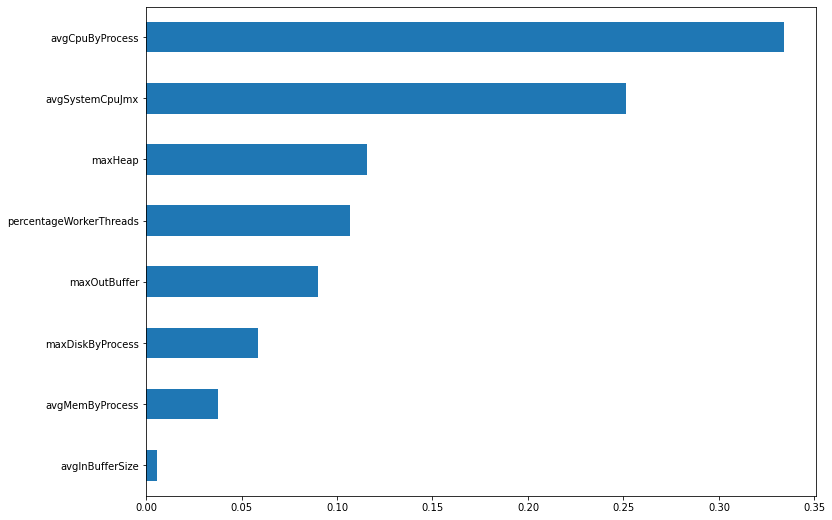

In [17]:
#Check feature importance
feature_list=ras_metrics_training.columns
feat_importances = pd.Series(model.feature_importances_, index=feature_list)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(12,9))

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV   #Grid search for finding out the best package

lasso=Lasso(max_iter=50000)
parameters={'alpha': [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train,Y_train)

#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
best_grid_lasso=lasso_regressor.best_params_

print(lasso_regressor.best_params_)
print("R Squared value for the model",lasso_regressor.best_score_)

In [27]:
#Training data for the Logistic Regression
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads','avgInBufferSize','maxOutBuffer','avgMemByProcess','avgSystemCpuJmx']]
ras_metrics_training_LogReg

,averageExecutionTime,avgCpuByProcess,maxDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,12966.0,0.112635,323020917,0.325,2.000000,0.0,2.107,52.0,0.113167
1,12150.6,0.111258,323025606,0.342,2.000000,0.0,4.040,52.0,0.110290
2,13150.4,0.173955,323030816,0.339,3.000000,0.2,4.040,52.0,0.176758
3,13566.0,0.234493,323036547,0.321,4.285714,0.0,3.027,52.0,0.234362
4,13694.4,0.257938,323042799,0.345,5.000000,0.0,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...,...
968,17198.4,0.532957,1738144175,0.393,19.400000,0.0,0.987,54.0,0.542362
972,18124.4,0.457554,1740645419,0.701,23.500000,0.0,4.160,54.0,0.465447
974,19259.6,0.516426,1740821755,0.591,25.333333,0.0,6.840,54.0,0.520700
975,19166.8,0.512790,1740828528,0.734,26.333333,0.0,9.053,54.0,0.519609


In [28]:
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg

y=ras_metrics_training_LogReg['quintile']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_Test=train_test_split(X, y,test_size=0.2,random_state=1)
ras_metrics_training_LogReg.describe()
y.describe()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    844.000000
mean       1.500000
std        1.118697
min        0.000000
25%        0.750000
50%        1.500000
75%        2.250000
max        3.000000
Name: quintile, dtype: float64

Model Accuracy
0.5621301775147929


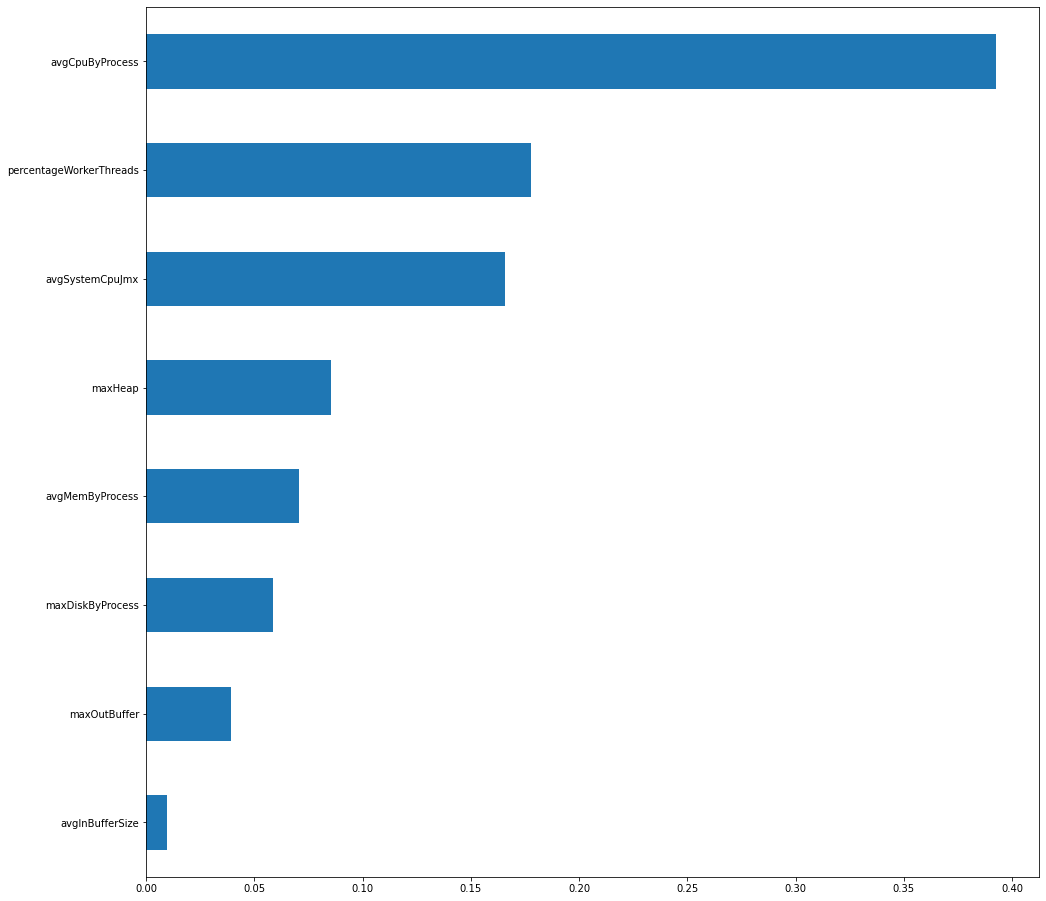

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_Test))

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
model_lr.score(X_train,Y_train)

from sklearn.metrics import roc_auc_score

Y_pred =model_lr.predict(X_train)
Y_pred
#roc_auc_score(Y_pred, Y_train)